<a href="https://colab.research.google.com/github/gustavor10silva/IC-Redes-Neurais-Artificiais/blob/main/Chapter11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
%matplotlib inline

# Chapter 11 - Training Deep Neural Networks

# Vanishing/Exploding Gradients Problems

* Vanishing Gradients Problem: training never converges to a good
solution

* Exploding Gradients Problem: the algorithm diverges

## Glorot and He Initialization

* fan-in: number of inputs of the layer
* fan-out number of neurons of the layer

The connection weights of each layer must be initialized randomly as described in below equation

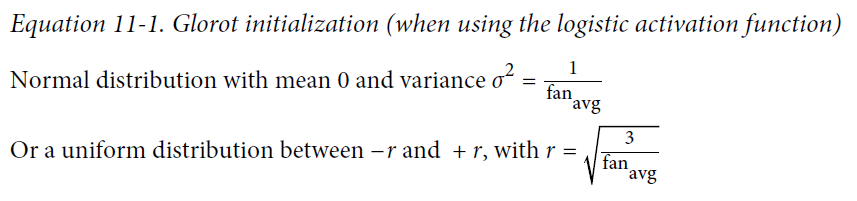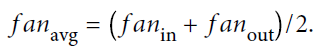

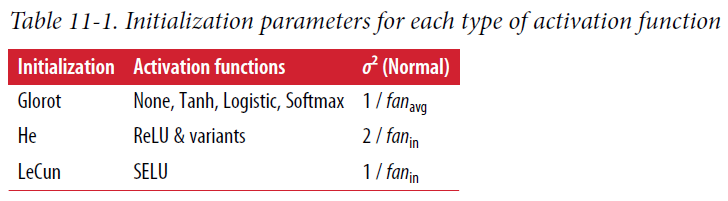

To change the kernel initializer:

In [ ]:
# keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")
# or
# he_avg_init = keras.initializers.VarianceScaling(scale=2., mode='fan_avg',distribution='uniform')
# keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

## Nonsaturating Activation Functions

* Sigmoid: saturate for large positive and negative values

* ReLU: don't saturate for negative values and it's fast to compute, but suffer from dying ReLUs problem

* $LeakyReLU_{\alpha}(z) = max(\alpha z, z)$: neurons never die, they can stay in a long coma, but have a chance of wake up

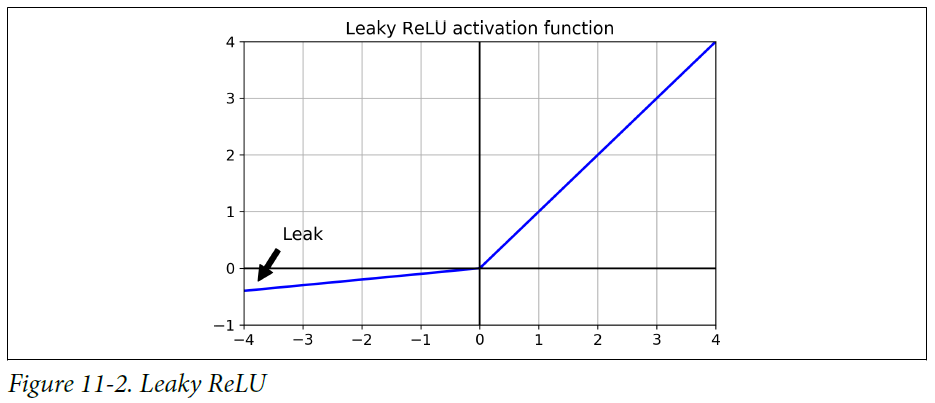

* Randomized leaky ReLU (RReLU): $\alpha$ is picked randomly in a given range during training, and it is fixed during testing

* Parametric leaky ReLU (PReLU): $\alpha$ can be learned during training; it's very good on large images dataset, but on smaller datasets it runs the risk of overfitting

* exponential linear unit (ELU): it's better than all the ReLU variants; reduce the training time and improves model performance in the test set; it takes on negative values when $z < 0$; it has a nonzero gradient for $z < 0$; if $\alpha$ is equal to 1 then the function is smooth everywhere

* if you build a neural network composed exclusively of a stack of dense layers, and if all hidden layers use the SELU (scaled ELU) activation function, then the network will self-normalize (with some conditions, see pg. 331)

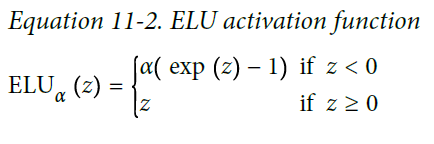

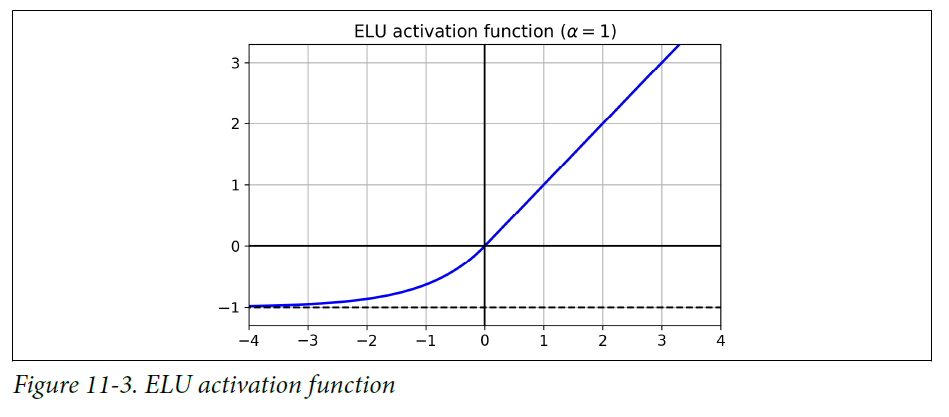

In [ ]:
# leaky ReLU activation function (or PReLU, using PReLU(alpha=0.2))
# leaky_relu = keras.layers.LeakyReLU(alpha=0.2)
# layer = keras.layers.Dense(10, activation=leaky_relu,kernel_initializer="he_normal")

In [ ]:
# SELU activation function
# layer = keras.layers.Dense(10, activation="selu",kernel_initializer="lecun_normal")

# Reutilizando camadas pré-treinadas

## Transfer Learning (transferência de aprendizado) com Keras

Suponha que os problemas A e B são similares, onde já existem redes neurais treinadas com uma performance boa para resolver o problema A e queremos resolver o problema B. 

Em vez de iniciar o treinamento da rede B com pesos aleatórios, podemos usar as camadas inferiores da rede A para compor a rede B, acrescentando mais camadas superiores - se necessário - e a camada de saída adequada para o problema B.

Usar camadas de uma rede em outra, como nesse exemplo, é chamado de transfer learning (transferência de aprendizado)

**Exemplo:** seja o conjunto data_A, que é o fashion MNIST com 8 rótulos (todos exceto sandals e shirts), onde já existe uma rede neural model_A treinada para fazer a classificação entre essas classes. Temos o conjunto data_B, que contém os dados retirados do fashion MNIST somente para as classes sandals e shirts. Vamos construir essa situação e resolver o problema B usando o que já sabemos da rede model_A.

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.7/dist-packages/tensorflow/keras/datasets/fashion_mnist/__init__.py'>

In [ ]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

## Exercício 8 - Deep Learning

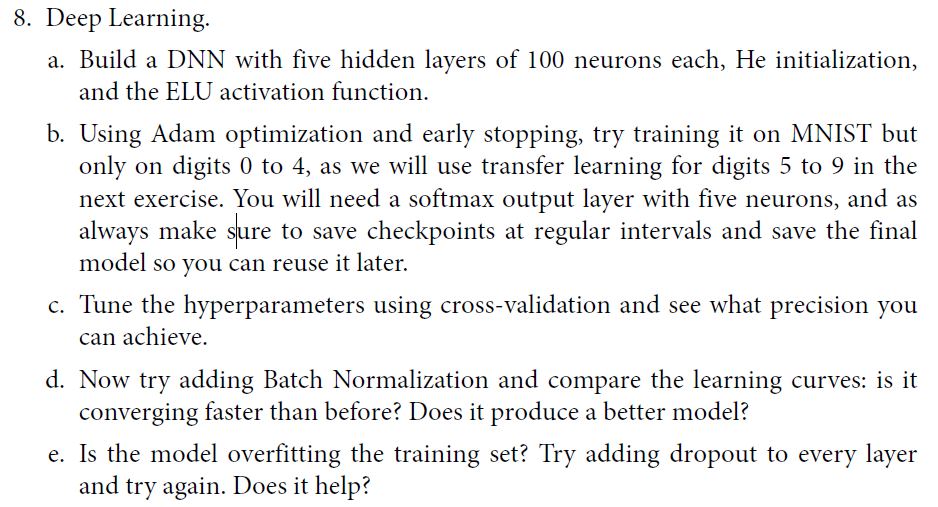

## Tradução livre:

a) Construa uma rede neural densa com cinco camadas escondidas de 100  neurônios cada, função de inicialização He e função de ativação ELU.

b) Usando a otimização Adam e o callback early stopping, tente treinar ela usando o conjunto de dados MNIST mas somente com dígitos de 0 a 4, pois usaremos transferência de aprendizado para os dígitos de 5 a 9 no próximo exercício. Você precisará de uma camada de saída com função softmax e 5 neurônios. Sempre lembre-se de salvar o modelo em intervalos regulares durante o treinamento e salvar o modelo final para poder reutilizá-lo mais tarde.

c) Tune os hiperparâmetros usando validação cruzada e veja qual é a precisão que você consegue atingir.

d) Agora tente adicionar a normalização em lote e comparar as curvas de aprendizado: estão convergindo mais rápido do que antes? Isso produz um modelo melhor?

e) O modelo está overfittando (sobreajustando) o conjunto de treino? Tente adicionar dropout em cada camada e tentar novamente. Isso ajuda?

Antes de tudo, vamos baixar o dataset MNIST:

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data(path="mnist.npz")

11493376/11490434 [==============================] - 0s 0us/step


Agora, vamos dar uma breve explorada na estrutura do dataset. Note, na figura abaixo, que a imagem do número 5, em $X\_train\_full[0]$ corresponde ao rótulo 5, em $y\_train\_full[0]$.

5


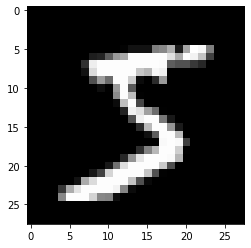

In [93]:
fig = plt.figure
plt.imshow(X_train_full[0], cmap='gray')
print(y_train_full[0])
plt.show()

O comando $X\_train\_full.shape$ retorna a dimensão da matriz $X\_train\_full$. Veja que essa matriz tem 60 mil linhas, cada linha possui uma matriz de dimensão 28x28. Podemos interpretar isso assim: imagine que cada matriz 28x28 é uma folha de papel quadrada e a matriz $X\_train\_full$ é uma pilha com 60 mil folhas desse tipo. 

In [96]:
X_train_full.shape, X_train_full.dtype

((60000, 28, 28), dtype('uint8'))

Temos 60 mil dados para treino e 10 mil para os testes:

In [94]:
len(X_train_full), len(X_test)

(60000, 10000)

## a. Construa uma rede neural densa com cinco camadas escondidas de 100  neurônios cada, função de inicialização He e função de ativação ELU.

In [55]:
from functools import partial

hidden = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(5, activation="softmax")
])

## b) Usando a otimização Adam e o callback early stopping, tente treinar a rede usando o conjunto de dados MNIST mas somente com dígitos de 0 a 4, pois usaremos transferência de aprendizado para os dígitos de 5 a 9 no próximo exercício. Você precisará de uma camada de saída com função softmax e 5 neurônios. Sempre lembre-se de salvar o modelo em intervalos regulares durante o treinamento e salvar o modelo final para poder reutilizá-lo mais tarde.

A seguir, vamos repartir os conjuntos de treino e de teste. Os conjuntos com índice 1 são voltados às imagens dos números de 0 a 4. Já os com índice 2 são para imagens de números de 5 a 9. Vamos dividir primeiro o conjunto de treino:

In [5]:
X1 = X_train_full[y_train_full <= 4]
y1 = y_train_full[y_train_full <= 4]
X2 = X_train_full[y_train_full > 4]
y2 = y_train_full[y_train_full > 4]

Agora vamos dividir o conjunto de teste:

In [101]:
X1_test = X_test[y_test <= 4]
y1_test = y_test[y_test <= 4]
X2_test = X_test[y_test > 4]
y2_test = y_test[y_test > 4]

In [108]:
len(X1), len(y1), len(X2), len(y2), len(X1_test), len(y1_test), len(X2_test), len(y2_test)

(30596, 30596, 29404, 29404, 5139, 5139, 4861, 4861)

Note abaixo que a relação entre $X_1$ e $y_1$ está correta, uma vez que a imagem da posição $X_1[i]$ corresponde ao número $y_1[i]$. O mesmo ocorre com $X_2$ e $y_2$.

4


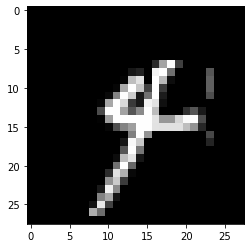

In [110]:
fig = plt.figure
plt.imshow(X1[28], cmap='gray')
print(y1[28])
plt.show()

5


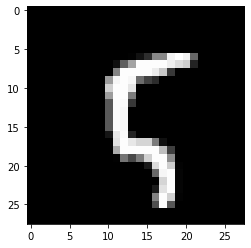

In [111]:
fig = plt.figure
plt.imshow(X2[45], cmap='gray')
print(y2[45])
plt.show()

Agora, vamos treinar a rede neural no conjunto 1, com os números de 0 a 4. Começamos dividindo o conjunto de treinamento entre treino e validação. Como a escala de cinza no conjunto original é um inteiro de 0 a 255, vamos dividir o conjunto por 255 para que essa escala fique entre 0 e 1.

In [9]:
X1_valid, X1_train = X1[:25000]/255.0, X1[25000:]/255.0
y1_valid, y1_train = y1[:25000], y1[25000:]

In [102]:
X1_test_scaled = X1_test/255.0
X2_test_scaled = X2_test/255.0

Como o conjunto MNIST já possui uma distribuição aleatória dos dados (com relação aos rótulos), podemos dividir os conjuntos da forma feita acima. Caso a distribuição não fosse aleatória (ex.: se os dados estiverem todos ordenados; primeiro as imagens de zeros, depois de uns, etc) teríamos que utilizar o train_test_split.

No exemplo abaixo, 30% dos dados estão sendo reservados para a validação.

In [56]:
# X1_train, X1_valid, y1_train, y1_test = train_test_split(X1_train_full, y1_train_full, test_size=0.30, random_state=42)

Agora, vamos compilar o modelo com o otimizador Adam, com $\beta_1 = 0.9$ e $\beta_2=0.999$:

In [56]:
optimizer = keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

Finalmente, vamos ao treinamento do modelo no conjunto 1, com dados de 0 a 4. 

In [57]:
history = model.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 2s 10ms/step - loss: 0.4766 - accuracy: 0.8421 - val_loss: 0.1259 - val_accuracy: 0.9617
Epoch 2/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0819 - accuracy: 0.9757 - val_loss: 0.1130 - val_accuracy: 0.9652
Epoch 3/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0538 - accuracy: 0.9827 - val_loss: 0.1005 - val_accuracy: 0.9698
Epoch 4/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0376 - accuracy: 0.9898 - val_loss: 0.1083 - val_accuracy: 0.9686
Epoch 5/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0241 - accuracy: 0.9917 - val_loss: 0.0963 - val_accuracy: 0.9722
Epoch 6/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0175 - accuracy: 0.9955 - val_loss: 0.0956 - val_accuracy: 0.9732
Epoch 7/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0088 - accuracy: 0.9975 - val_loss: 0.1103 - val_accuracy: 0.970

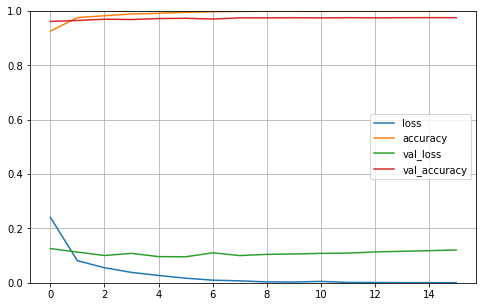

In [58]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [59]:
model.evaluate(X1_test, y1_test)

161/161 [==============================] - 0s 2ms/step - loss: 74.6316 - accuracy: 0.7110


[74.63155364990234, 0.711033284664154]

## c) Tune os hiperparâmetros usando validação cruzada e veja qual é a precisão que você consegue atingir.

Para isso, precisamos reestruturar a rede neural, para que ela fique em forma de função, onde os argumentos serão os hiperparâmetros. Podemos fazer isso da seguinte maneira:

In [50]:
def build_model(n_hidden=5, n_neurons=100, learning_rate=1e-3, input_shape=[28,28], beta_1=0.9, beta_2=0.999):
  modelinho = keras.models.Sequential()
  modelinho.add(keras.layers.Flatten(input_shape=input_shape))
  for layer in range(n_hidden):
    modelinho.add(keras.layers.Dense(n_neurons, activation="elu"))
  modelinho.add(keras.layers.Dense(5, activation="softmax"))
  optimizer = keras.optimizers.Adam(learning_rate, beta_1, beta_2)
  modelinho.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
  return modelinho

Agora, rotulamos essa função como um regressor do Keras:

In [51]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

Note que podemos treinar o modelo normalmente fazendo "keras_reg.fit(...)". A vantagem é que, tendo o modelo nesse formato, podemos usar o GridSearchCV e o RandomizedSearchCV para encontrar os melhores hiperparâmetros. 

In [52]:
history2 = keras_reg.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 2s 11ms/step - loss: 0.3638 - accuracy: 0.8795 - val_loss: 0.1277 - val_accuracy: 0.9596
Epoch 2/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0934 - accuracy: 0.9723 - val_loss: 0.1253 - val_accuracy: 0.9633
Epoch 3/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0516 - accuracy: 0.9840 - val_loss: 0.1144 - val_accuracy: 0.9674
Epoch 4/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0444 - accuracy: 0.9872 - val_loss: 0.1848 - val_accuracy: 0.9497
Epoch 5/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0511 - accuracy: 0.9806 - val_loss: 0.1306 - val_accuracy: 0.9643
Epoch 6/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 0.1145 - val_accuracy: 0.9739
Epoch 7/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0288 - accuracy: 0.9891 - val_loss: 0.1658 - val_accuracy: 0.964

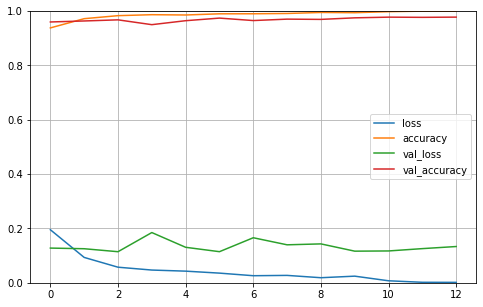

In [53]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [61]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
param_distribs = {
"n_hidden": [5],
"n_neurons": [100],
"learning_rate": [3e-4, 3e-3, 3e-2, 3e-1],
"beta_1": [0.7, 0.8, 0.9],
"beta_2": [0.999]
}
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=5)
rnd_search_cv.fit(X1_train, y1_train, epochs=100,
validation_data=(X1_valid, y1_valid),
callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
140/140 [==============================] - 2s 13ms/step - loss: 0.6439 - accuracy: 0.8099 - val_loss: 0.1497 - val_accuracy: 0.9546
Epoch 2/100
140/140 [==============================] - 1s 11ms/step - loss: 0.0882 - accuracy: 0.9757 - val_loss: 0.1343 - val_accuracy: 0.9580
Epoch 3/100
140/140 [==============================] - 2s 11ms/step - loss: 0.0627 - accuracy: 0.9828 - val_loss: 0.1342 - val_accuracy: 0.9611
Epoch 4/100
140/140 [==============================] - 2s 11ms/step - loss: 0.0440 - accuracy: 0.9871 - val_loss: 0.1408 - val_accuracy: 0.9610
Epoch 5/100
140/140 [==============================] - 2s 12ms/step - loss: 0.0421 - accuracy: 0.9896 - val_loss: 0.1322 - val_accuracy: 0.9627
Epoch 6/100
140/140 [==============================] - 2s 12ms/step - loss: 0.0296 - accuracy: 0.9923 - val_loss: 0.1494 - val_accuracy: 0.9615
Epoch 7/100
140/140 [==============================] - 1s 10ms/step - loss: 0.0290 - accuracy: 0.9932 - val_loss: 0.1507 - val_accuracy:

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f1a7ae33490>,
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'beta_1': [0.7, 0.8, 0.9],
                                        'beta_2': [0.999],
                                        'learning_rate': [0.0003, 0.003, 0.03,
                                                          0.3],
                                        'n_hidden': [5], 'n_neurons': [100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [62]:
rnd_search_cv.best_params_

{'beta_1': 0.7,
 'beta_2': 0.999,
 'learning_rate': 0.003,
 'n_hidden': 5,
 'n_neurons': 100}

Feito isso, vamos construir e treinar novamente um modelo com essa estrutura. Mas, dessa vez, usando todo o conjunto de treino 

In [63]:
from functools import partial

hidden = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model3 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(100),
 hidden(5, activation="softmax")
])
optimizer = keras.optimizers.Adam(lr=0.003, beta_1=0.7, beta_2=0.999)
model3.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [64]:
history3 = model3.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 2s 10ms/step - loss: 0.3869 - accuracy: 0.8737 - val_loss: 0.2151 - val_accuracy: 0.9367
Epoch 2/200
175/175 [==============================] - 2s 9ms/step - loss: 0.1306 - accuracy: 0.9637 - val_loss: 0.1189 - val_accuracy: 0.9708
Epoch 3/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0585 - accuracy: 0.9814 - val_loss: 0.1083 - val_accuracy: 0.9727
Epoch 4/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0633 - accuracy: 0.9820 - val_loss: 0.2157 - val_accuracy: 0.9525
Epoch 5/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0504 - accuracy: 0.9872 - val_loss: 0.1308 - val_accuracy: 0.9612
Epoch 6/200
175/175 [==============================] - 1s 8ms/step - loss: 0.0431 - accuracy: 0.9880 - val_loss: 0.1096 - val_accuracy: 0.9703
Epoch 7/200
175/175 [==============================] - 2s 9ms/step - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0994 - val_accuracy: 0.974

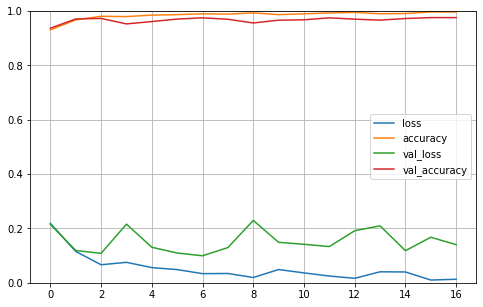

In [65]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [66]:
model3.evaluate(X1_test, y1_test)

161/161 [==============================] - 0s 2ms/step - loss: 21.7239 - accuracy: 0.9617


[21.72394371032715, 0.961665689945221]

## d) Agora tente adicionar a normalização em lote e comparar as curvas de aprendizado: estão convergindo mais rápido do que antes? Isso produz um modelo melhor?

In [67]:
from functools import partial

hidden = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model4 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 hidden(100),
 keras.layers.BatchNormalization(),
 hidden(100),
 keras.layers.BatchNormalization(),
 hidden(100),
 keras.layers.BatchNormalization(),
 hidden(100),
 keras.layers.BatchNormalization(),
 hidden(100),
 keras.layers.BatchNormalization(),
 hidden(5, activation="softmax")
])
optimizer = keras.optimizers.Adam(lr=0.003, beta_1=0.7, beta_2=0.999)
model4.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [68]:
history4 = model4.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 4s 13ms/step - loss: 0.3275 - accuracy: 0.8891 - val_loss: 0.1274 - val_accuracy: 0.9624
Epoch 2/200
175/175 [==============================] - 2s 11ms/step - loss: 0.1017 - accuracy: 0.9683 - val_loss: 0.1338 - val_accuracy: 0.9606
Epoch 3/200
175/175 [==============================] - 2s 11ms/step - loss: 0.0764 - accuracy: 0.9749 - val_loss: 0.0919 - val_accuracy: 0.9742
Epoch 4/200
175/175 [==============================] - 2s 11ms/step - loss: 0.0553 - accuracy: 0.9830 - val_loss: 0.1524 - val_accuracy: 0.9628
Epoch 5/200
175/175 [==============================] - 2s 12ms/step - loss: 0.0648 - accuracy: 0.9795 - val_loss: 0.1499 - val_accuracy: 0.9675
Epoch 6/200
175/175 [==============================] - 2s 11ms/step - loss: 0.0407 - accuracy: 0.9865 - val_loss: 0.1200 - val_accuracy: 0.9724
Epoch 7/200
175/175 [==============================] - 2s 11ms/step - loss: 0.0471 - accuracy: 0.9844 - val_loss: 0.1532 - val_accuracy:

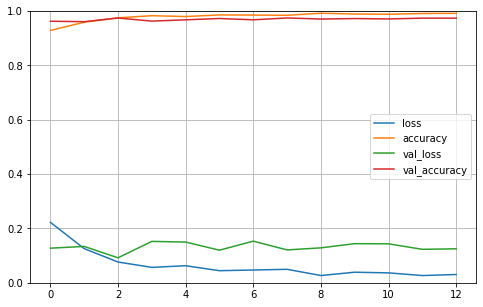

In [69]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [44]:
model4.evaluate(X1_train, y1_train)

175/175 [==============================] - 0s 2ms/step - loss: 0.0094 - accuracy: 0.9975


[0.0094215776771307, 0.9974982142448425]

In [70]:
model4.evaluate(X1_test, y1_test)

161/161 [==============================] - 1s 2ms/step - loss: 20.5053 - accuracy: 0.9325


[20.505327224731445, 0.9324771165847778]

## e) O modelo está overfittando (sobreajustando) o conjunto de treino? Tente adicionar dropout em cada camada e tentar novamente. Isso ajuda?

In [72]:
from functools import partial

hidden = partial(keras.layers.Dense, activation="elu", kernel_initializer="he_normal")

model5 = keras.models.Sequential([
 keras.layers.Flatten(input_shape=[28, 28]),
 keras.layers.BatchNormalization(),
 keras.layers.Dropout(rate=0.2),
 hidden(100),
 keras.layers.BatchNormalization(),
 keras.layers.Dropout(rate=0.2),
 hidden(100),
 keras.layers.BatchNormalization(),
 keras.layers.Dropout(rate=0.2),
 hidden(100),
 keras.layers.BatchNormalization(),
 keras.layers.Dropout(rate=0.2),
 hidden(100),
 keras.layers.BatchNormalization(),
 keras.layers.Dropout(rate=0.2),
 hidden(100),
 keras.layers.BatchNormalization(),
 keras.layers.Dropout(rate=0.2),
 hidden(5, activation="softmax")
])
optimizer = keras.optimizers.Adam(lr=0.003, beta_1=0.7, beta_2=0.999)
model5.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [73]:
history5 = model5.fit(X1_train, y1_train, epochs=200, validation_data=(X1_valid, y1_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
175/175 [==============================] - 4s 14ms/step - loss: 0.6178 - accuracy: 0.7988 - val_loss: 0.1627 - val_accuracy: 0.9558
Epoch 2/200
175/175 [==============================] - 2s 12ms/step - loss: 0.1924 - accuracy: 0.9406 - val_loss: 0.1263 - val_accuracy: 0.9638
Epoch 3/200
175/175 [==============================] - 2s 12ms/step - loss: 0.1373 - accuracy: 0.9594 - val_loss: 0.1182 - val_accuracy: 0.9675
Epoch 4/200
175/175 [==============================] - 2s 12ms/step - loss: 0.1368 - accuracy: 0.9561 - val_loss: 0.1188 - val_accuracy: 0.9699
Epoch 5/200
175/175 [==============================] - 2s 12ms/step - loss: 0.1167 - accuracy: 0.9644 - val_loss: 0.1157 - val_accuracy: 0.9709
Epoch 6/200
175/175 [==============================] - 2s 12ms/step - loss: 0.1078 - accuracy: 0.9670 - val_loss: 0.1023 - val_accuracy: 0.9734
Epoch 7/200
175/175 [==============================] - 2s 13ms/step - loss: 0.1135 - accuracy: 0.9704 - val_loss: 0.1024 - val_accuracy:

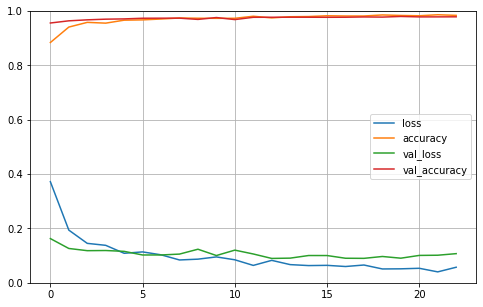

In [74]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [88]:
model5.evaluate(X1_test, y1_test)

161/161 [==============================] - 0s 2ms/step - loss: 4.9706 - accuracy: 0.2209


[4.970560550689697, 0.220860093832016]

Dúvida: o treinamento foi feito com os dados normalizados. Ao normalizar o conjunto de teste para fazer a avaliação, o loss diminui e a acurácia também. O correto é usar os dados para teste normalizados ou não? A acurácia é uma boa métrica para esse problema?

Podemos usar o modelo $model5$ para prever o rótulo das imagens. Tomemos algumas imagens do conjunto de teste (podemos fazer isso porque o conjunto de teste não foi usado no treinamento).

2


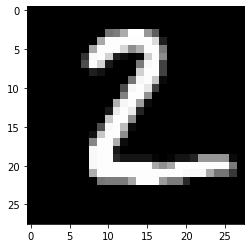

1


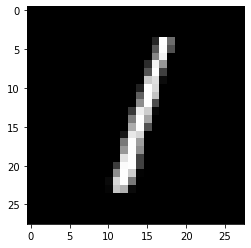

0


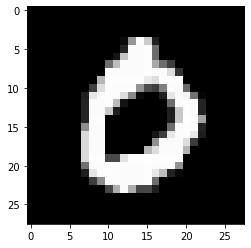

In [96]:
for i in range(3):
  fig = plt.figure
  plt.imshow(X1_test[i], cmap='gray')
  print(y1_test[i])
  plt.show()

In [104]:
X_new = X1_test[:3]
y_proba = model5.predict(X_new)
y_proba.round(2), y1_test[:3]

(array([[0., 0., 1., 0., 0.],
        [0., 1., 0., 0., 0.],
        [1., 0., 0., 0., 0.]], dtype=float32), array([2, 1, 0], dtype=uint8))

## Exercício 9 (Transferência de Aprendizado)

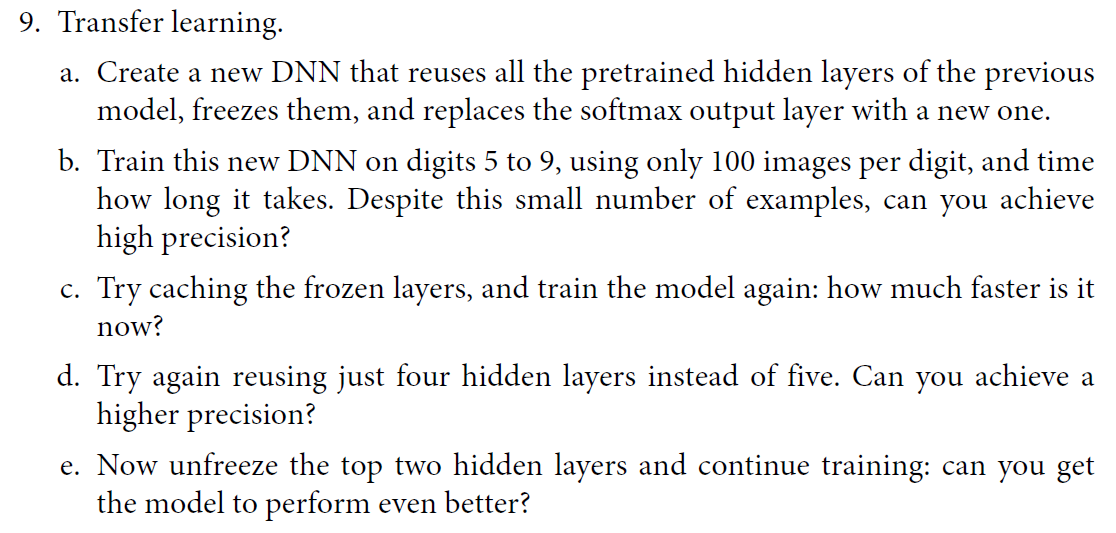

## Tradução livre:

a) Crie uma nova rede neural densa que reutiliza todas as camadas escondidas pré-treinadas do modelo anterior, congele elas e adicione uma camada de saída com a função softmax.

b) Treine essa nova rede neural densa nos dígitos de 5 a 9, usando somente 100 imagens por dígito e cronometre quanto tempo isso leva. Depois desse pequeno número de exemplos, você conseguiu uma precisão boa?

c) Tente descongelar as camadas congeladas e treine o modelo novamente, quão mais rápido ele está agora?

d) Tente reutilizar novamente somente quatro camadas escondidas em vez de cinco. Você conseguiu atingir uma boa precisão?

e) Agora, descongele as duas camadas escondidas do topo e continue treinando: você pode fazer o modelo ficar ainda melhor?